In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only White Sox players

white_sox_data = master_data.loc[master_data["Franchise"] == "White Sox"]

#Only showing players that signed with the White Sox

signed_white_sox_data = white_sox_data.loc[white_sox_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_white_sox_data.groupby("Year")

#Unsigned White Sox draft picks

unsigned_white_sox_data = white_sox_data.loc[white_sox_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1998    61.4
1990    55.6
1989    42.1
2010    33.9
2011    25.8
1988    25.1
1983    24.8
1970    24.0
1987    23.2
1974    21.5
2004    21.4
1977    20.1
1991    19.0
2001    15.5
1978    15.2
1976    14.2
1993    14.0
1996    13.6
2008    13.5
2014     9.8
2005     9.6
2002     9.5
1973     9.2
1985     9.0
1982     8.4
1966     7.9
2003     7.2
2013     6.7
1968     6.4
2007     5.4
1992     5.1
1999     4.9
2006     3.1
1997     3.0
1981     2.8
1975     2.6
1971     2.2
2000     2.0
1980     1.8
1986     1.4
1967     0.2
1969     0.2
2019     0.0
2018     0.0
2017     0.0
1979    -0.5
2016    -0.5
1994    -0.7
1965    -0.8
2009    -0.9
2015    -0.9
1984    -1.2
1972    -1.8
2012    -2.0
1995    -2.5
Name: Total_WAR, dtype: float64

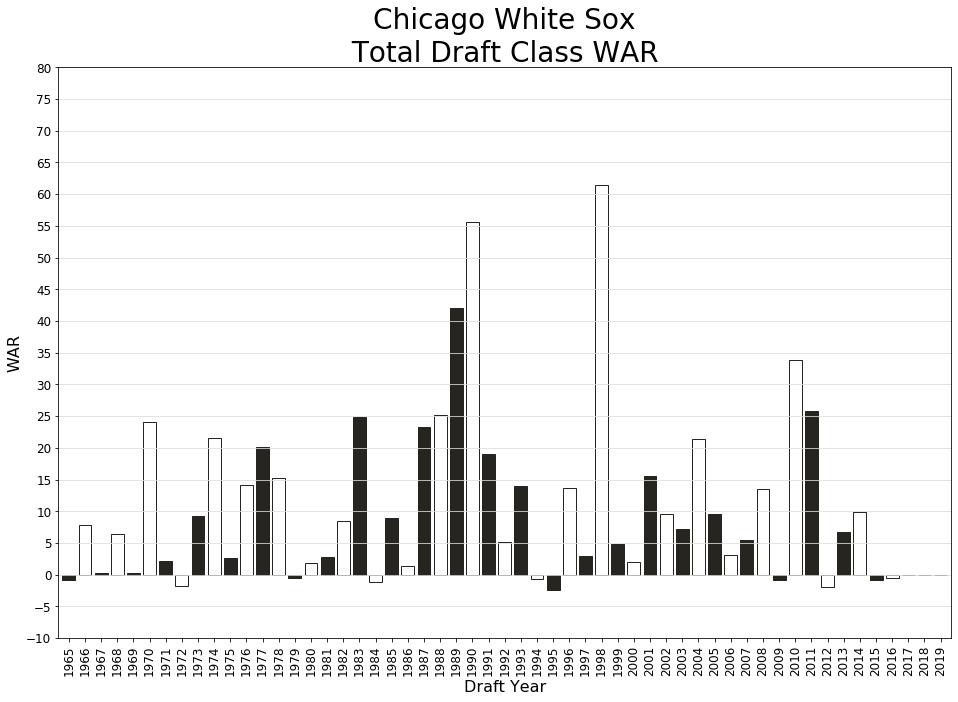

In [14]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#27251F", "white"], width = .8, fontsize = 12, edgecolor = "#27251F", figsize = (16, 10.5))
plt.title("Chicago White Sox\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("White Sox WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_white_sox_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
20960,1989,1,7,White Sox,White Sox,Y,Frank Thomas,1990.0,thomafr04,255.0,41.5,0.0,41.5,1B,4Yr,Auburn University,Auburn,AL,More than 25 WAR
53187,2010,1,13,White Sox,White Sox,Y,Chris Sale,2010.0,salech01,10603.0,-0.1,27.1,27.0,LHP,4Yr,Florida Gulf Coast University,Fort Myers,FL,More than 25 WAR
19530,1988,1,10,White Sox,White Sox,Y,Robin Ventura,1989.0,venturo01,854.0,26.6,0.0,26.6,3B,4Yr,Oklahoma State University,Stillwater,OK,More than 25 WAR
36516,1998,38,1139,White Sox,White Sox,Y,Mark Buehrle,2000.0,buehrma01,225.0,-0.2,25.3,25.1,LHP,JC,Jefferson College,Hillsboro,MO,More than 25 WAR
15147,1983,11,279,White Sox,White Sox,Y,Doug Drabek,1986.0,drabedo01,1003473.0,1.0,21.9,22.9,RHP,4Yr,University of Houston,Houston,TX,20-25 WAR
22447,1990,1,4,White Sox,White Sox,Y,Alex Fernandez,1990.0,fernaal01,1003993.0,0.0,21.6,21.6,RHP,4Yr,Miami-Dade College Kendall Campus,Miami,FL,20-25 WAR
18262,1987,1,5,White Sox,White Sox,Y,Jack McDowell,1987.0,mcdowja01,1008473.0,0.0,20.2,20.2,RHP,4Yr,Stanford University,Palo Alto,CA,20-25 WAR
35412,1998,1,35,White Sox,White Sox,Y,Aaron Rowand,2001.0,rowanaa01,254.0,19.7,0.0,19.7,OF,4Yr,California State University Fullerton,Fullerton,CA,15-20 WAR
24418,1991,18,488,White Sox,White Sox,Y,Mike Cameron,1995.0,camermi01,1070.0,19.5,0.0,19.5,OF,HS,LaGrange HS,LaGrange,GA,15-20 WAR
44233,2004,1,38,White Sox,White Sox,Y,Gio Gonzalez,2008.0,gonzagi01,7448.0,-0.6,18.4,17.8,LHP,HS,Monsignor Edward Pace HS,Miami Gardens,FL,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_white_sox_data.loc[((signed_white_sox_data["WAR Group"] == "Less than 5 WAR") |
(signed_white_sox_data["WAR Group"] == "No Major League Experience")) & 
(signed_white_sox_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
16,1965,1,17,White Sox,White Sox,Y,Ken Plesha,NaN,NaN,NaN,NaN,NaN,NaN,C,4Yr,University of Notre Dame,South Bend,IN,No Major League Experience
1667,1967,1,13,White Sox,White Sox,Y,Bill Haynes,NaN,NaN,NaN,NaN,NaN,NaN,3B,HS,Headland HS,East Point,GA,No Major League Experience
2643,1968,1,14,White Sox,White Sox,Y,Rich McKinney,1970.0,mckinri01,1008599.0,-0.5,0.0,-0.5,SS,4Yr,Ohio University,Athens,OH,Less than 5 WAR
3544,1969,1,3,White Sox,White Sox,Y,Ted Nicholson,NaN,NaN,NaN,NaN,NaN,NaN,3B,HS,Oak Park HS,Laurel,MS,No Major League Experience
4589,1970,1,6,White Sox,White Sox,Y,Lee Richard,1971.0,richale01,1010915.0,-1.6,0.0,-1.6,SS,4Yr,Southern University and A&M College,Baton Rouge,LA,Less than 5 WAR
6323,1972,1,12,White Sox,White Sox,Y,Mike Ondina,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Cordova HS,Rancho Cordova,CA,No Major League Experience
7123,1973,1,21,White Sox,White Sox,Y,Steve Swisher,1974.0,swishst01,1012795.0,0.2,0.0,0.2,C,4Yr,Ohio University,Athens,OH,Less than 5 WAR
7857,1974,1,8,White Sox,White Sox,Y,Larry Monroe,1976.0,monrola01,1009057.0,0.0,0.1,0.1,RHP,HS,Forest View HS,Rolling Meadows,IL,Less than 5 WAR
8547,1975,1,11,White Sox,White Sox,Y,Chris Knapp,1975.0,knappch01,1007026.0,0.0,3.2,3.2,RHP,4Yr,Central Michigan University,Mount Pleasant,MI,Less than 5 WAR
11501,1979,1,19,White Sox,White Sox,Y,Ricky Seilheimer,1980.0,seilhri01,1011729.0,-0.5,0.0,-0.5,C,HS,Brenham HS,Brenham,TX,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_white_sox_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
33832,1997,2,62,White Sox,White Sox,N,Jeff Weaver,1999.0,weaveje01,503.0,0.8,21.8,22.6,RHP,4Yr,California State University Fresno,Fresno,CA,20-25 WAR
11725,1979,10,243,White Sox,White Sox,N,Jimmy Key,1984.0,keyji01,1006885.0,0.0,20.0,20.0,LHP,HS,S. R. Butler HS,Huntsville,AL,20-25 WAR
9367,1976,7,152,White Sox,White Sox,N,Willie McGee,1982.0,mcgeewi01,1008513.0,18.0,0.0,18.0,OF,HS,Ells HS,Richmond,CA,15-20 WAR
51169,2008,34,1020,White Sox,White Sox,N,Marcus Semien,2013.0,semiema01,12533.0,17.4,0.0,17.4,SS,HS,St. Mary's HS,Berkeley,CA,15-20 WAR
26881,1992,48,1352,White Sox,White Sox,N,Mike Lowell,1998.0,lowelmi01,527.0,17.3,0.0,17.3,2B,HS,Coral Gables HS,Coral Gables,FL,15-20 WAR
28298,1993,49,1357,White Sox,White Sox,N,Placido Polanco,1998.0,polanpl01,1176.0,13.9,0.0,13.9,2B,4Yr,Miami-Dade College Wolfson Campus,Miami,FL,10-15 WAR
29506,1994,30,845,White Sox,White Sox,N,Eric Gagne,1999.0,gagneer01,650.0,-0.1,14.0,13.9,RHP,HS,Polyvalente HS,Mascouche,QC,10-15 WAR
11491,1979,1,9,White Sox,White Sox,N,Steve Buechele,1985.0,buechst01,1001630.0,10.9,0.0,10.9,SS,HS,Servite HS,Anaheim,CA,10-15 WAR
1479,1966,34,657,White Sox,White Sox,N,Geoff Zahn,1973.0,zahnge01,1014410.0,-0.3,10.7,10.4,LHP,4Yr,University of Michigan,Ann Arbor,MI,10-15 WAR
5657,1971,7,149,White Sox,White Sox,N,Warren Cromartie,1974.0,cromawa01,1002786.0,9.3,0.0,9.3,OF,HS,Jackson HS,Miami,FL,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_white_sox_data.loc[signed_white_sox_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
36516,1998,38,1139,White Sox,White Sox,Y,Mark Buehrle,2000.0,buehrma01,225.0,-0.2,25.3,25.1,LHP,JC,Jefferson College,Hillsboro,MO,More than 25 WAR
15147,1983,11,279,White Sox,White Sox,Y,Doug Drabek,1986.0,drabedo01,1003473.0,1.0,21.9,22.9,RHP,4Yr,University of Houston,Houston,TX,20-25 WAR
24418,1991,18,488,White Sox,White Sox,Y,Mike Cameron,1995.0,camermi01,1070.0,19.5,0.0,19.5,OF,HS,LaGrange HS,LaGrange,GA,15-20 WAR
40241,2001,16,493,White Sox,White Sox,Y,Chris Young,2006.0,youngch04,3882.0,14.4,0.0,14.4,OF,HS,Bellaire HS,Bellaire,TX,10-15 WAR
27366,1993,15,425,White Sox,White Sox,Y,Mike Sirotka,1995.0,sirotmi01,1012015.0,0.0,11.4,11.4,LHP,4Yr,Louisiana State University,Baton Rouge,LA,10-15 WAR
41743,2002,17,510,White Sox,White Sox,Y,Brandon McCarthy,2005.0,mccarbr01,4662.0,-0.1,7.3,7.2,RHP,JC,Lamar Community College,Lamar,CO,5-10 WAR
8259,1974,18,412,White Sox,White Sox,Y,Dave Frost,1977.0,frostda01,1004376.0,0.0,7.0,7.0,RHP,4Yr,Stanford University,Palo Alto,CA,5-10 WAR
17009,1985,19,475,White Sox,White Sox,Y,Randy Velarde,1987.0,velarra01,942.0,6.1,0.0,6.1,SS,4Yr,Lubbock Christian University,Lubbock,TX,5-10 WAR
26293,1992,27,764,White Sox,White Sox,Y,Brendan Donnelly,2002.0,donnebr01,1441.0,0.0,5.7,5.7,RHP,4Yr,Colorado Mesa University,Grand Junction,CO,5-10 WAR
28202,1993,45,1261,White Sox,White Sox,Y,Frank Menechino,1999.0,menecfr01,931.0,5.7,-0.1,5.6,2B,4Yr,University of Alabama,Tuscaloosa,AL,5-10 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(white_sox_data["Year"], white_sox_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,40.0,57.5,2.5
1966,36.6,58.5,4.9
1967,15.4,78.8,5.8
1968,22.6,71.0,6.5
1969,38.9,52.8,8.3
1970,40.6,59.4,0.0
1971,15.4,84.6,0.0
1972,37.5,58.3,4.2
1973,32.5,65.0,2.5


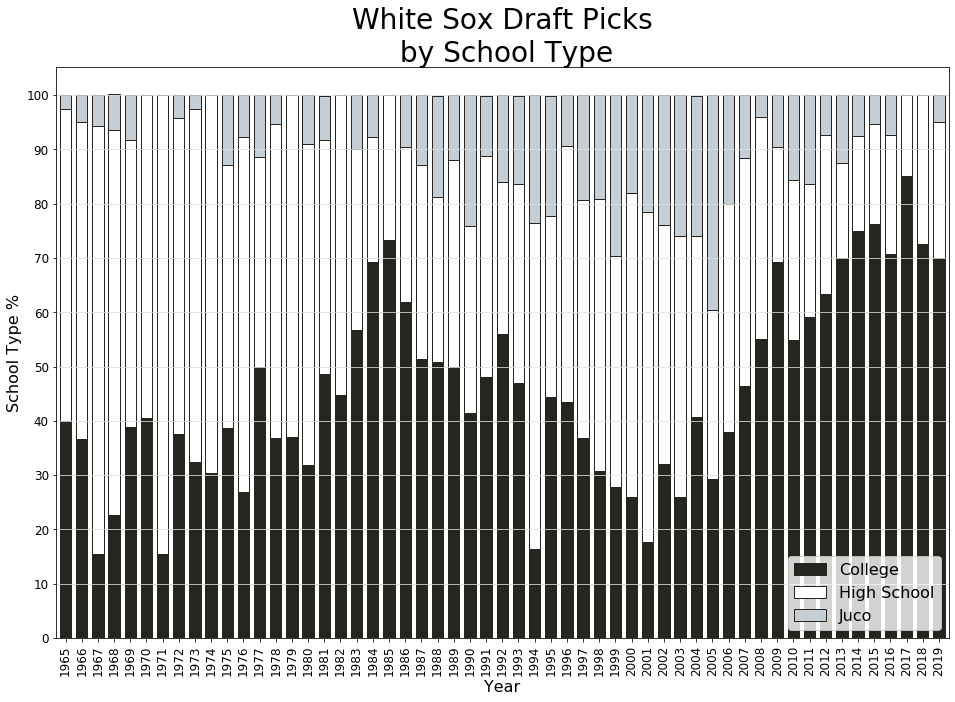

In [13]:
#Bar chart of table above

colors = ["#27251F", "white", "#C4CED4"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#27251F", stacked = True, figsize = (16, 10.5))
plt.title("White Sox Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("White Sox Draft Picks by School Type.png")
plt.show()